<a href="https://colab.research.google.com/github/maliozdemir1/dsa210-project-impact-of-climate-on-gastronomic-diversity/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

foods = pd.read_csv("manual_clean_en.csv", encoding="utf-8-sig")
clim  = pd.read_csv("iklim_mgm_1991_2020.csv", encoding="utf-8-sig")

print("Foods shape:", foods.shape)
print("Climate shape:", clim.shape)

display(foods.head(5))
display(clim.head(5))


Foods shape: (1530, 5)
Climate shape: (79, 28)


,province,food_name,product_group_tr,product_group_en,kcal_100g
0,Adana,Adana Halka Tatlısı,"Fırıncılık ve pastacılık mamulleri, hamur işle...","Bakery, pastry & desserts",320
1,Adana,Adana Karakuş Tatlısı,"Fırıncılık ve pastacılık mamulleri, hamur işle...","Bakery, pastry & desserts",294
2,Adana,Adana Kol Böreği,"Fırıncılık ve pastacılık mamulleri, hamur işle...","Bakery, pastry & desserts",226
3,Adana,Adana Taş Kadayıfı,"Fırıncılık ve pastacılık mamulleri, hamur işle...","Bakery, pastry & desserts",361
4,Sakarya,Adapazarı Kabak Tatlısı,"Fırıncılık ve pastacılık mamulleri, hamur işle...","Bakery, pastry & desserts",290


,province,m_param,temp_annual_mean,prec_annual_total,temp_m01,temp_m02,temp_m03,temp_m04,temp_m05,temp_m06,...,prec_m03,prec_m04,prec_m05,prec_m06,prec_m07,prec_m08,prec_m09,prec_m10,prec_m11,prec_m12
0,Adana,ADANA,19.458333,680.8,9.5,10.7,13.9,17.7,22.1,25.9,...,59.2,51.2,48.2,20.3,12.3,10.4,25.1,39.7,78.4,143.0
1,Adıyaman,ADIYAMAN,17.683333,729.5,5.0,6.2,10.4,15.3,20.9,27.1,...,87.3,61.7,45.2,9.4,1.9,2.5,9.2,48.6,74.1,142.0
2,Afyonkarahisar,AFYONKARAHISAR,11.691667,451.4,0.4,2.2,6.0,10.5,15.3,19.4,...,44.6,47.0,50.1,41.5,21.8,18.0,23.6,40.3,32.4,46.8
3,Aksaray,AKSARAY,12.775000,349.4,0.9,2.6,7.1,11.9,16.7,21.0,...,39.7,40.4,43.1,24.7,8.2,6.2,12.4,25.9,30.1,44.8
4,Amasya,AMASYA,13.791667,469.2,2.8,4.6,8.5,13.3,17.8,21.6,...,50.2,51.9,61.3,41.0,12.9,12.9,21.3,36.4,44.6,53.8


Firstly, we have controlled and show the outputs of the files that we are going to use from determining climate and calorie correlation.

In [ ]:
def normalize_province(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip().upper()
    tr_map = str.maketrans({"İ":"I","I":"I","ı":"I","Ş":"S","Ğ":"G","Ü":"U","Ö":"O","Ç":"C"})
    s = s.translate(tr_map)
    s = re.sub(r"[^A-Z0-9\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s.replace(" ", "")

foods["prov_key"] = foods["province"].apply(normalize_province)
clim["prov_key"]  = clim["province"].apply(normalize_province)

print("Unique provinces (foods):", foods["prov_key"].nunique())
print("Unique provinces (climate):", clim["prov_key"].nunique())


Unique provinces (foods): 83
Unique provinces (climate): 79


At this part, we have fixed the name of the provinces in terms of Turkish characters. Also, we need to fit the provinces with keys in order to prevent mismatching due to their names.

In [ ]:
foods_prov = (foods.groupby(["prov_key","province"], dropna=False)
              .agg(n_foods=("food_name","size"),
                   mean_kcal=("kcal_100g","mean"),
                   median_kcal=("kcal_100g","median"),
                   std_kcal=("kcal_100g","std"))
              .reset_index())

merged = foods_prov.merge(
    clim[["prov_key","temp_annual_mean","prec_annual_total"]],
    on="prov_key",
    how="inner"
)

print("Merged provinces:", merged.shape[0])
display(merged.head(5))


Merged provinces: 79


,prov_key,province,n_foods,mean_kcal,median_kcal,std_kcal,temp_annual_mean,prec_annual_total
0,ADANA,Adana,20,224.400000,227.5,212.563402,19.458333,680.8
1,ADIYAMAN,Adıyaman,7,216.857143,171.0,207.880117,17.683333,729.5
2,AFYONKARAHISAR,Afyonkarahisar,47,239.808511,241.0,122.455429,11.691667,451.4
3,AGRI,Ağrı,6,283.500000,276.5,61.282134,6.691667,512.9
4,AKSARAY,Aksaray,11,308.000000,277.0,139.529208,12.775000,349.4


After we have fixed the disorders and mismatches, we need to evaluate the number of foods, their calories, medians, climate and precipitation of the areas in scale of cities. Then, we are going to use exploratory data analysis techniques and graphs in order to visualize the correlation between our datas.

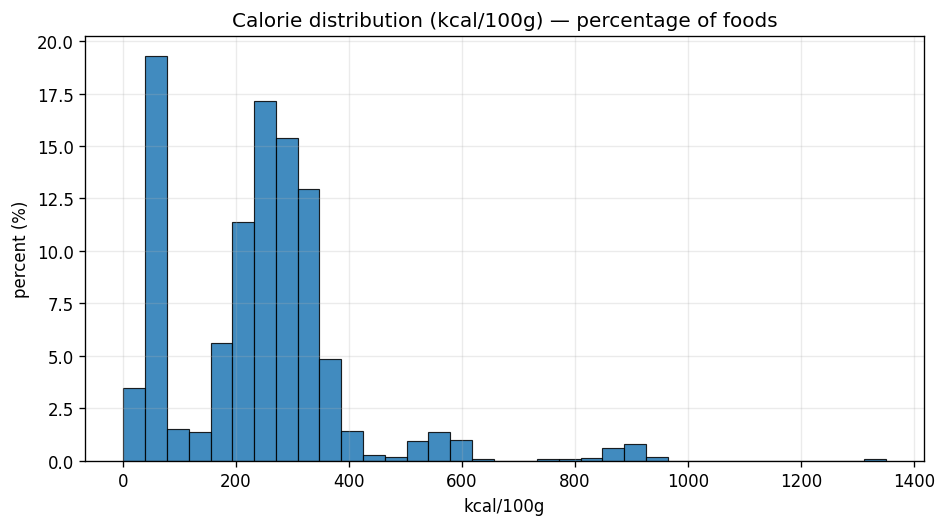

In [ ]:
import matplotlib.pyplot as plt

x = foods["kcal_100g"].dropna()

plt.figure(figsize=(8,4.5), dpi=120)
plt.hist(x, bins=35, weights=[100/len(x)]*len(x), edgecolor="black", linewidth=0.7, alpha=0.85)
plt.title("Calorie distribution (kcal/100g) — percentage of foods")
plt.xlabel("kcal/100g")
plt.ylabel("percent (%)")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


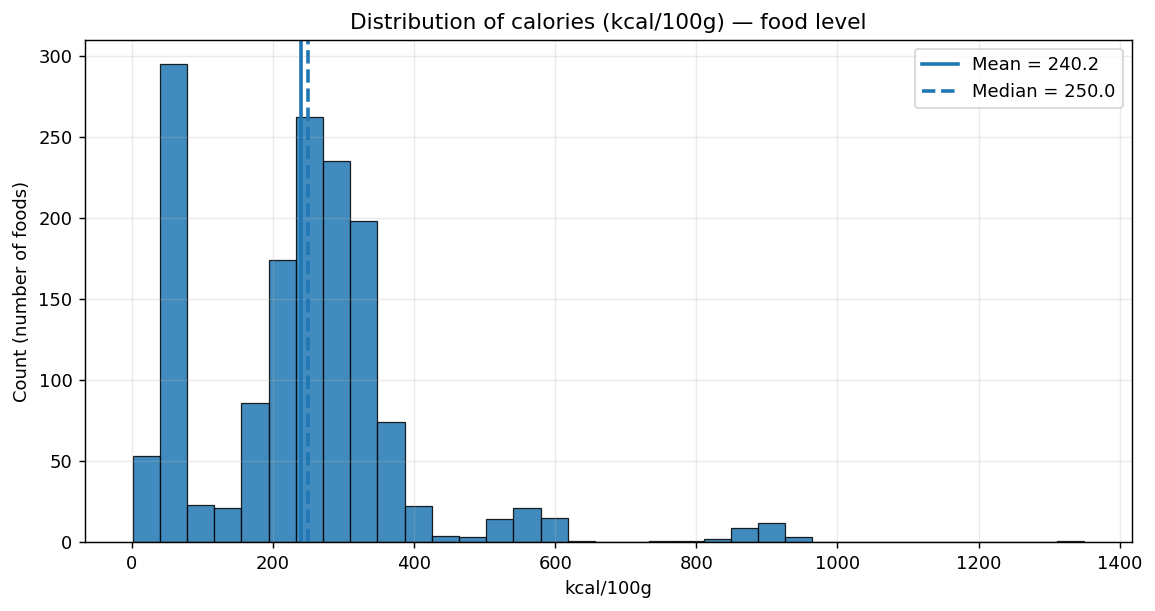

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = foods["kcal_100g"].dropna()

plt.figure(figsize=(9,4.8), dpi=130)

# histogram (COUNT)
plt.hist(x, bins=35, edgecolor="black", linewidth=0.7, alpha=0.85)

mean_v = x.mean()
med_v  = x.median()
plt.axvline(mean_v, linewidth=2, label=f"Mean = {mean_v:.1f}")
plt.axvline(med_v, linewidth=2, linestyle="--", label=f"Median = {med_v:.1f}")

plt.title("Distribution of calories (kcal/100g) — food level")
plt.xlabel("kcal/100g")
plt.ylabel("Count (number of foods)")
plt.grid(True, alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


There is our calorie/100g over the number of food in general distribution.


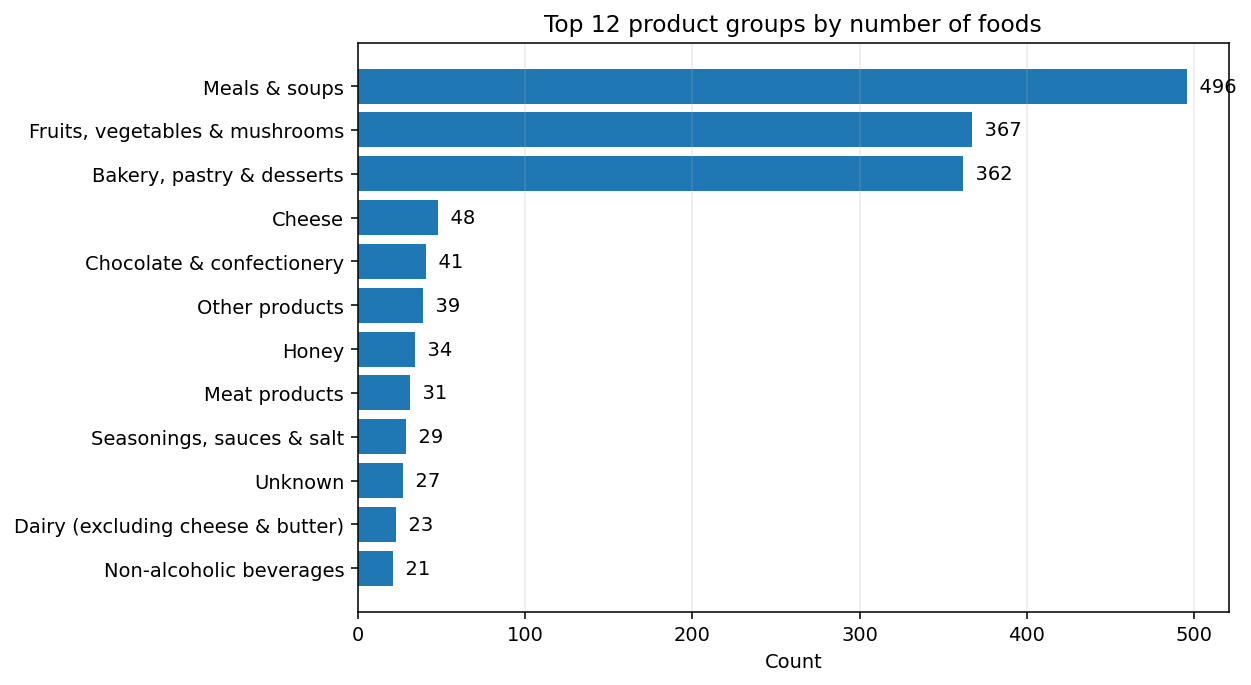

In [ ]:
import matplotlib.pyplot as plt

counts = foods["product_group_en"].value_counts().head(12).sort_values()

plt.figure(figsize=(9,5), dpi=140)
plt.barh(counts.index, counts.values)
plt.title("Top 12 product groups by number of foods")
plt.xlabel("Count")
plt.grid(axis="x", alpha=0.25)

for i, v in enumerate(counts.values):
    plt.text(v, i, f"  {v}", va="center")   # label at end of bars

plt.tight_layout()
plt.show()


Distribution of cultural food in terms of food categories. As we seen from the figure that, most of the Turkish cuisine is based on meals and soups.

/tmp/ipython-input-502052188.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(cats))   # generates len(cats) distinct colors


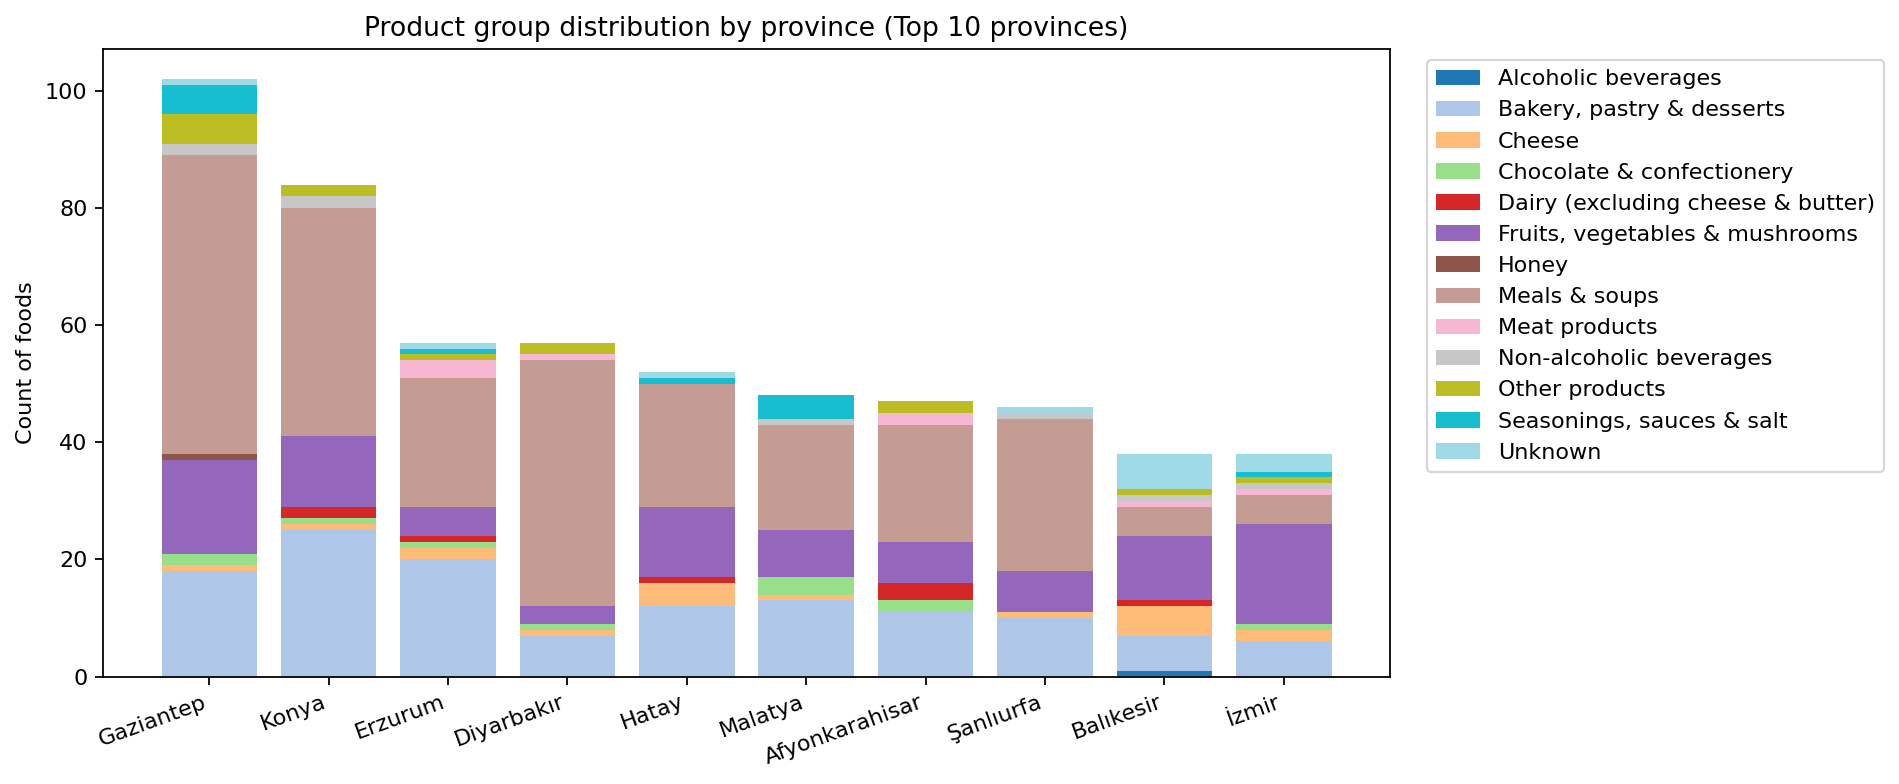

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

top_prov = foods["province"].value_counts().head(10).index.tolist()
sub = foods[foods["province"].isin(top_prov)].copy()

pivot = (sub.pivot_table(index="province",
                         columns="product_group_en",
                         values="food_name",
                         aggfunc="count",
                         fill_value=0))

# order provinces by total
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

cats = list(pivot.columns)
cmap = cm.get_cmap("tab20", len(cats))
colors = {cat: cmap(i) for i, cat in enumerate(cats)}
# ---------------------------------------------------

plt.figure(figsize=(12,5), dpi=160)

bottom = np.zeros(len(pivot))
for col in cats:
    vals = pivot[col].values
    plt.bar(pivot.index, vals, bottom=bottom, label=col, color=colors[col])
    bottom += vals

plt.title("Product group distribution by province (Top 10 provinces)")
plt.ylabel("Count of foods")
plt.xticks(rotation=20, ha="right")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


We can see the food group distribution over the first 10 cuisines of Turkey in numbers of food. Same again most of the food population is based on meals and soups.

/tmp/ipython-input-3538923836.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=short, showfliers=False)


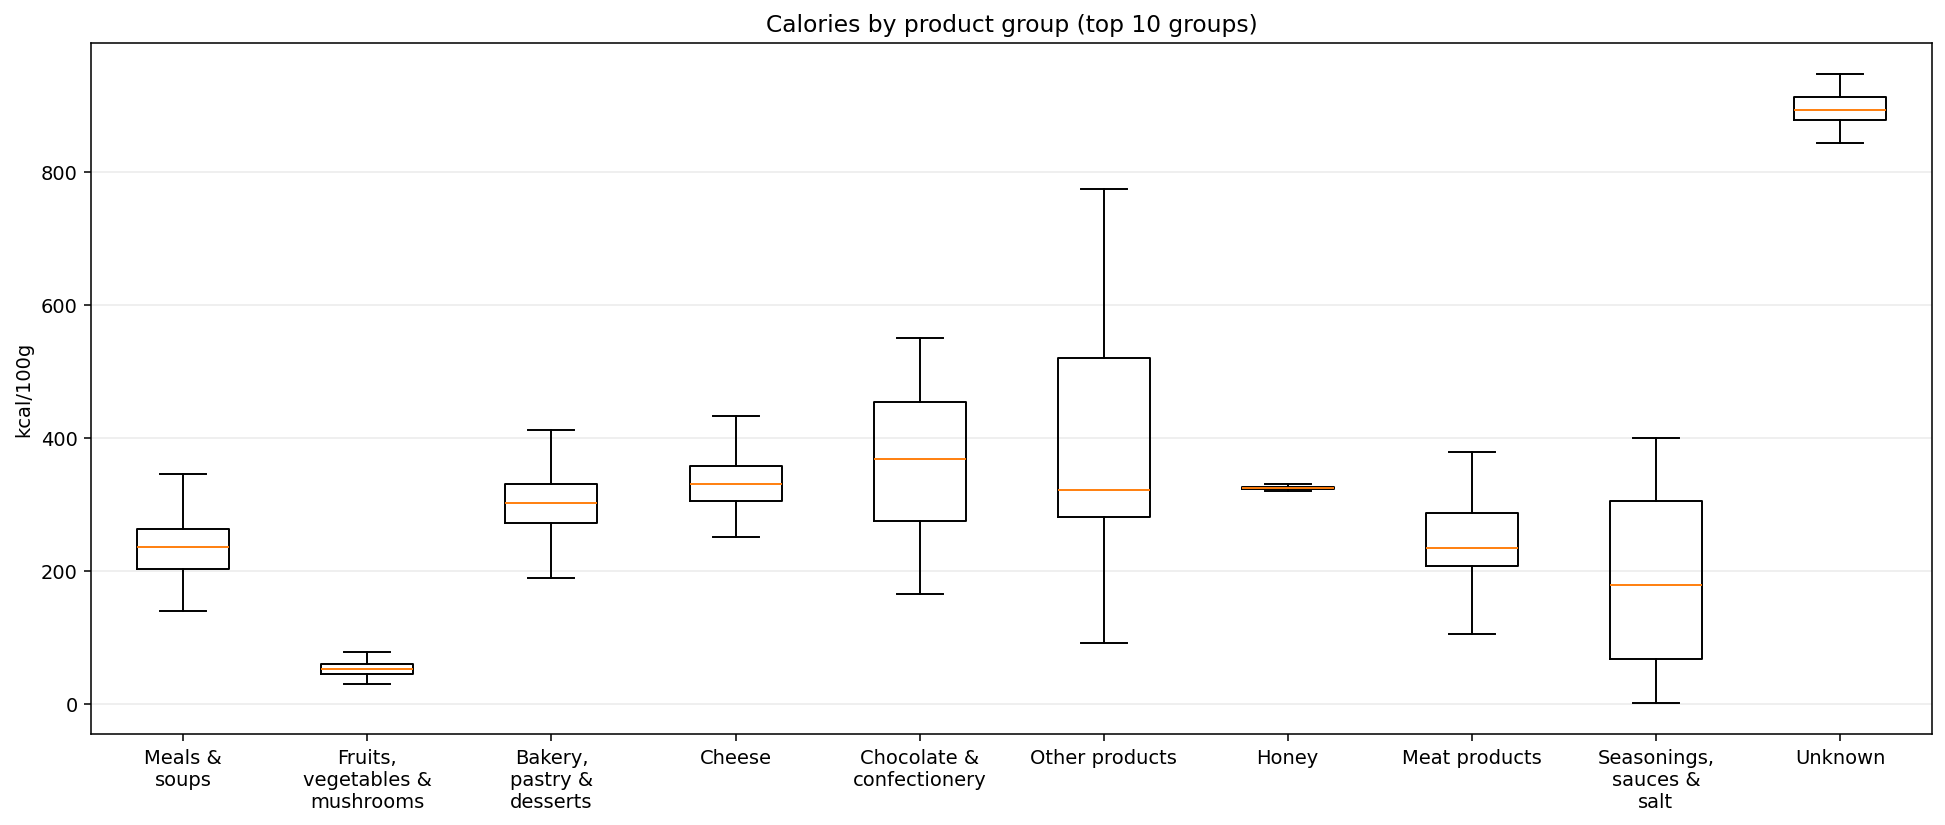

In [ ]:
import matplotlib.pyplot as plt

top_groups = foods["product_group_en"].value_counts().head(10).index.tolist()
short = [g.replace(" & ", " &\n").replace(", ", ",\n") for g in top_groups]
data = [foods.loc[foods["product_group_en"]==g, "kcal_100g"].dropna().values for g in top_groups]

plt.figure(figsize=(14,6), dpi=140)
plt.boxplot(data, labels=short, showfliers=False)
plt.title("Calories by product group (top 10 groups)")
plt.ylabel("kcal/100g")
plt.grid(axis="y", alpha=0.25)
plt.tight_layout()
plt.show()


We can learn the average mean of the calories of food categories.

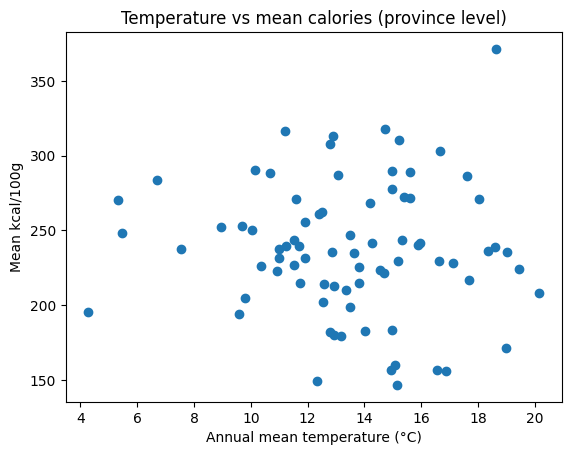

In [ ]:
plt.figure()
plt.scatter(merged["temp_annual_mean"], merged["mean_kcal"])
plt.title("Temperature vs mean calories (province level)")
plt.xlabel("Annual mean temperature (°C)")
plt.ylabel("Mean kcal/100g")
plt.show()


Temperature vs Calories Density

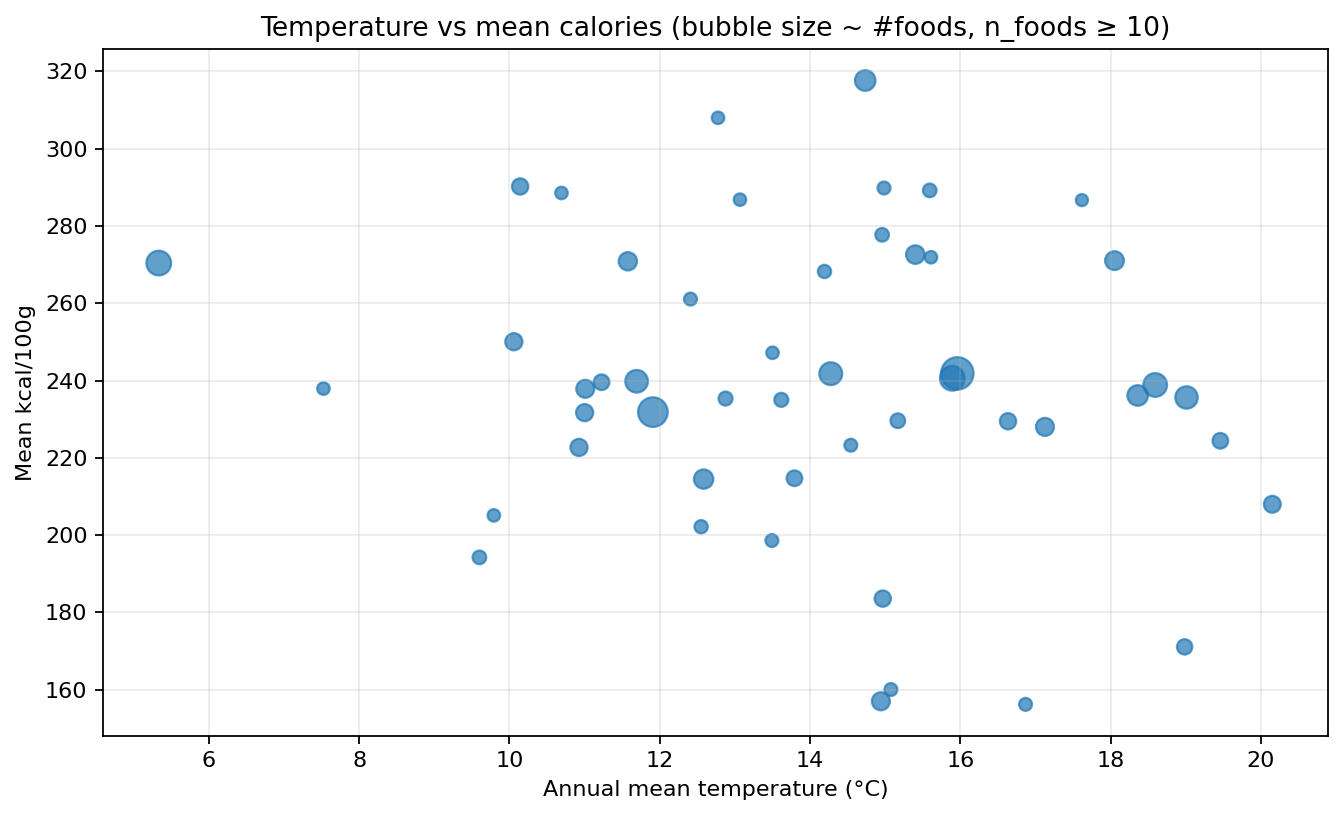

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

min_n = 10
df = merged[merged["n_foods"] >= min_n].copy()

x = df["temp_annual_mean"].values
y = df["mean_kcal"].values
sizes = df["n_foods"].values

plt.figure(figsize=(8.5,5.2), dpi=160)
plt.scatter(x, y, s=10 + 2*sizes, alpha=0.7)
plt.title(f"Temperature vs mean calories (bubble size ~ #foods, n_foods ≥ {min_n})")
plt.xlabel("Annual mean temperature (°C)")
plt.ylabel("Mean kcal/100g")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


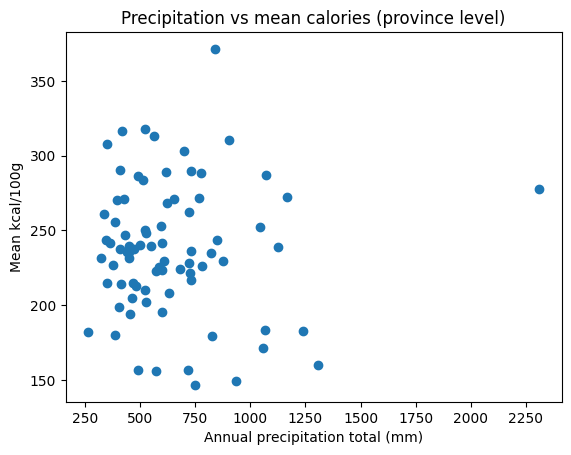

In [ ]:
plt.figure()
plt.scatter(merged["prec_annual_total"], merged["mean_kcal"])
plt.title("Precipitation vs mean calories (province level)")
plt.xlabel("Annual precipitation total (mm)")
plt.ylabel("Mean kcal/100g")
plt.show()


Precipitation vs Calorie Density

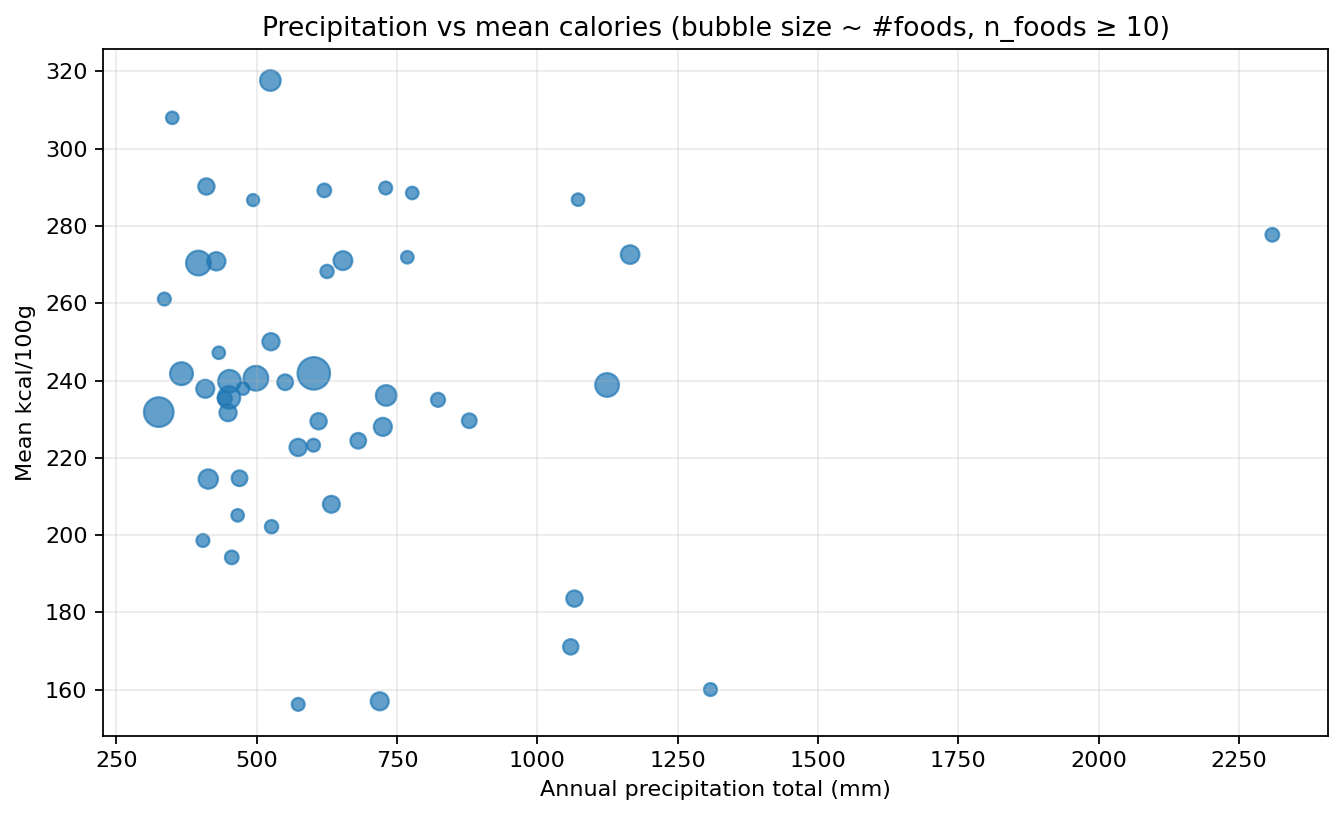

In [ ]:
import matplotlib.pyplot as plt

min_n = 10
df = merged[merged["n_foods"] >= min_n].copy()

plt.figure(figsize=(8.5,5.2), dpi=160)
plt.scatter(df["prec_annual_total"], df["mean_kcal"], s=10 + 2*df["n_foods"], alpha=0.7)
plt.title(f"Precipitation vs mean calories (bubble size ~ #foods, n_foods ≥ {min_n})")
plt.xlabel("Annual precipitation total (mm)")
plt.ylabel("Mean kcal/100g")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


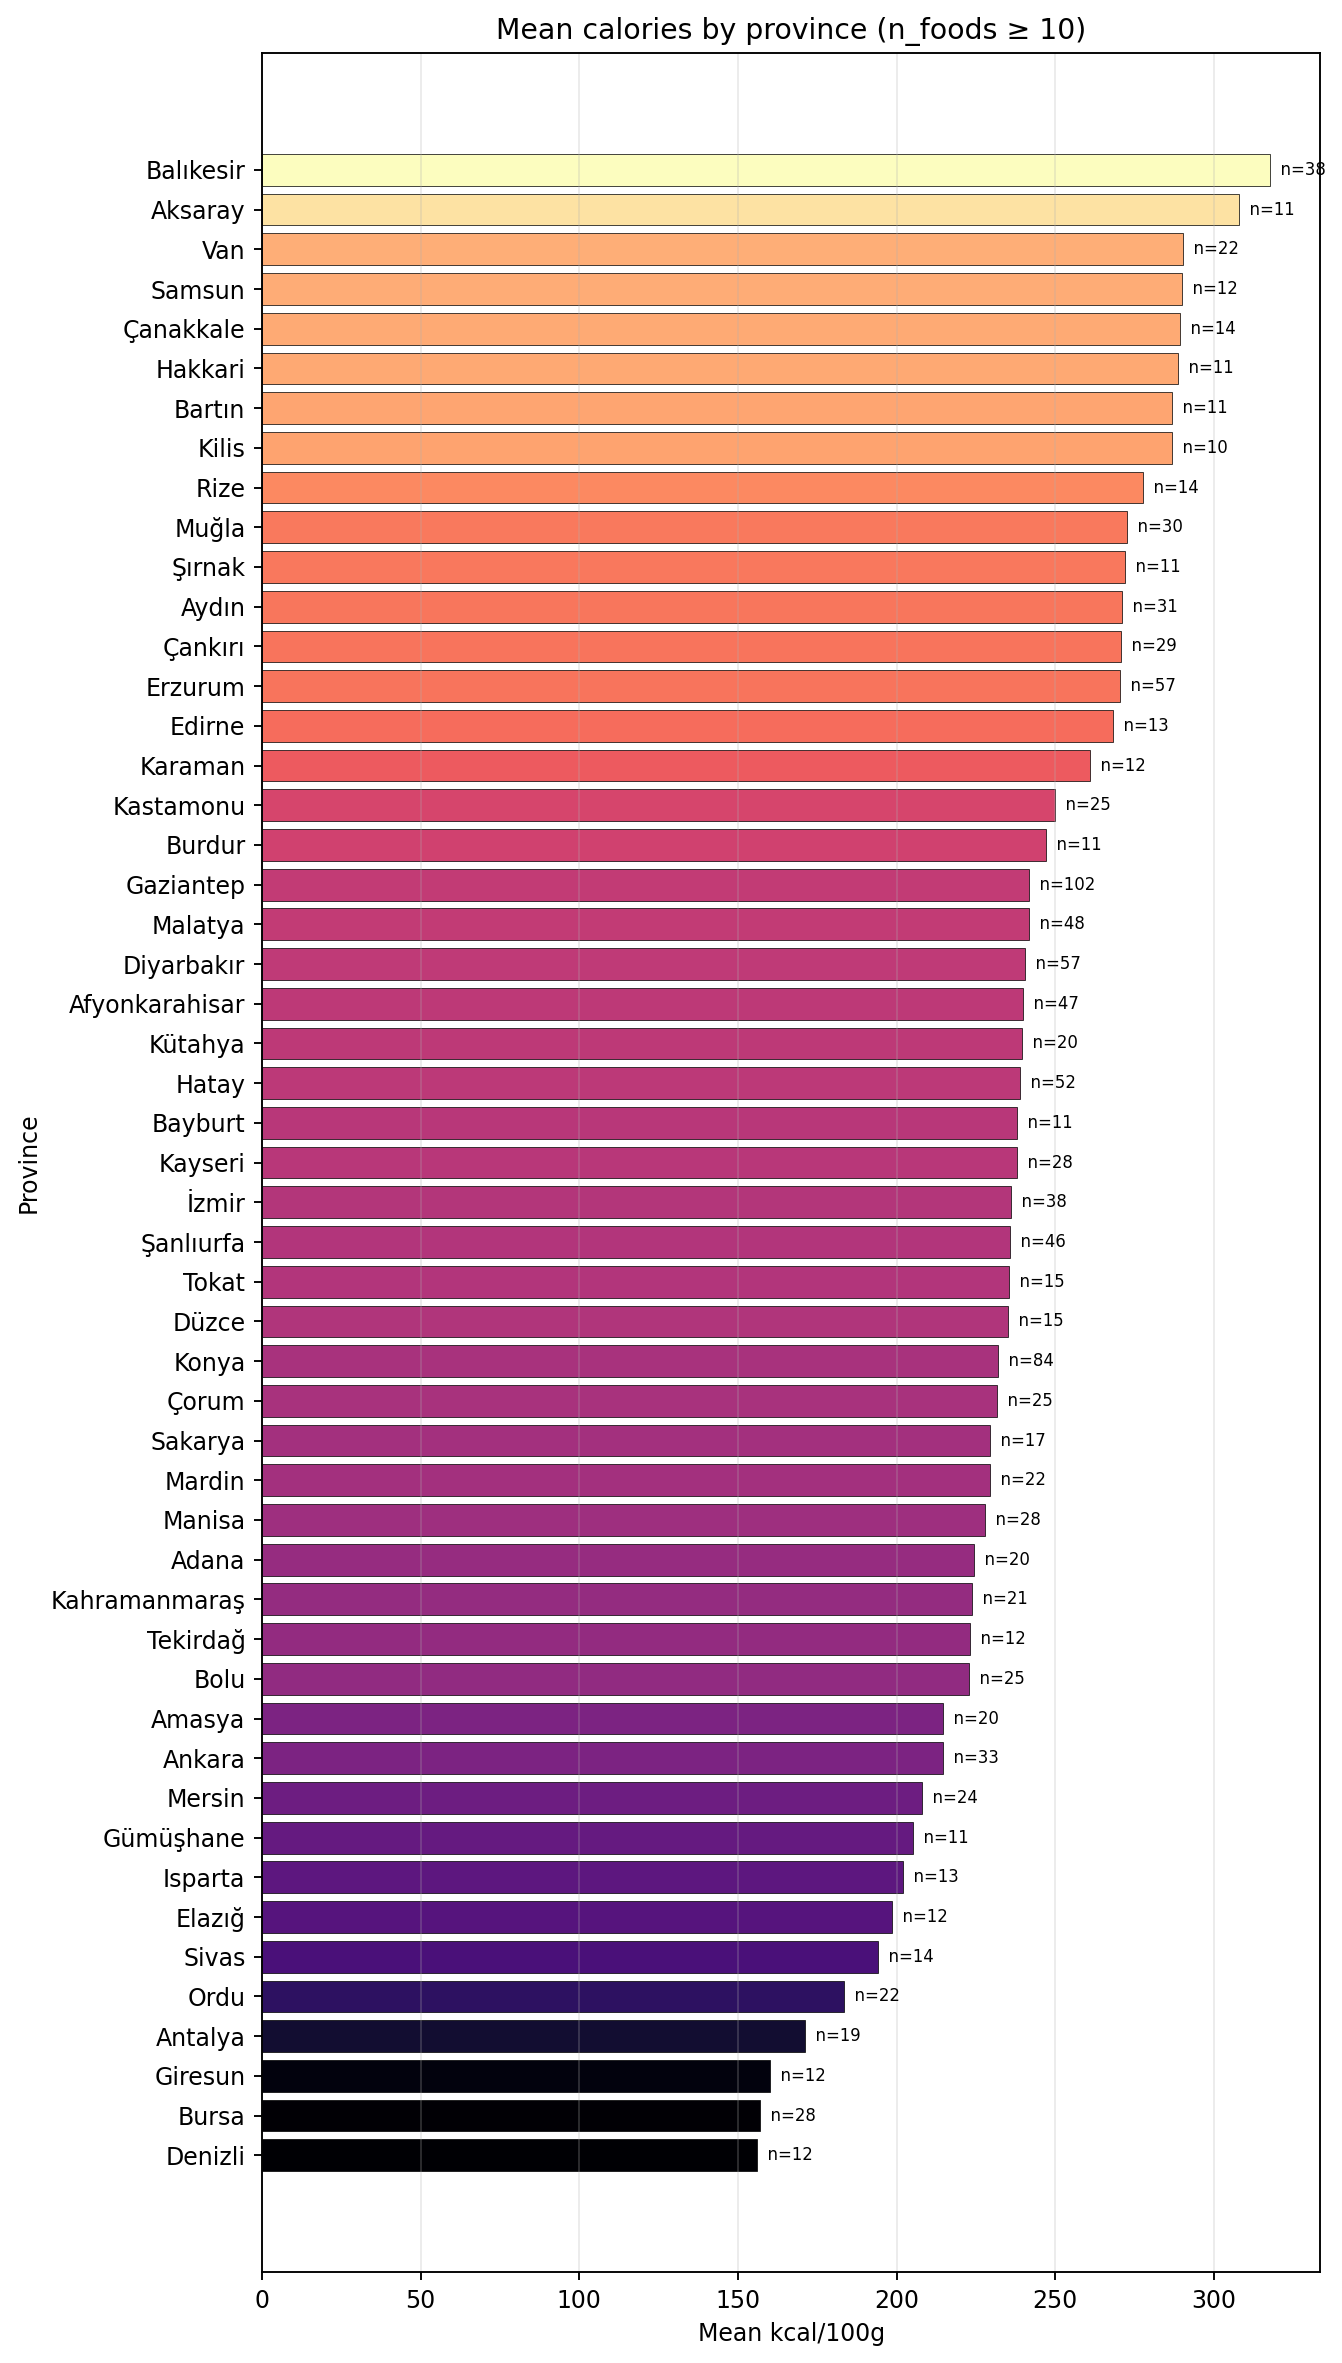

Provinces plotted: 51
Mean kcal range: 156.17 - 317.66


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# foods should have: province, food_name, kcal_100g
# -------------------------
if "foods_prov" not in globals():
    foods_prov = (foods.groupby("province", dropna=False)
                  .agg(n_foods=("food_name","size"),
                       mean_kcal=("kcal_100g","mean"))
                  .reset_index())

# -------------------------
# PARAMETERS
# -------------------------
min_n = 10        # filter provinces with too few foods (set 0 to disable)
top_k = None      # set e.g. 40 to show only top/bottom; keep None to show all

dfp = foods_prov.copy()
dfp = dfp.dropna(subset=["province","mean_kcal"])

if min_n and min_n > 0:
    dfp = dfp[dfp["n_foods"] >= min_n]

dfp = dfp.sort_values("mean_kcal", ascending=True)

# optionally keep only last top_k (highest mean_kcal)
if top_k is not None:
    dfp = dfp.tail(top_k)

# -------------------------
# COLOR SCALE (warm colormap)
# -------------------------
vals = dfp["mean_kcal"].values
norm = (vals - vals.min()) / (vals.max() - vals.min() + 1e-9)
colors = plt.cm.magma(norm)   # warm palette: magma / inferno / plasma

# -------------------------
# PLOT
# -------------------------
plt.figure(figsize=(8, 14), dpi=170)
plt.barh(dfp["province"], dfp["mean_kcal"], color=colors, edgecolor="black", linewidth=0.3)

plt.title(f"Mean calories by province (n_foods ≥ {min_n})" if min_n > 0 else "Mean calories by province")
plt.xlabel("Mean kcal/100g")
plt.ylabel("Province")
plt.grid(axis="x", alpha=0.25)

# annotate n_foods
for i, (v, n) in enumerate(zip(dfp["mean_kcal"].values, dfp["n_foods"].values)):
    plt.text(v, i, f"  n={int(n)}", va="center", fontsize=7)

plt.tight_layout()
plt.show()

print("Provinces plotted:", len(dfp))
print("Mean kcal range:", round(dfp["mean_kcal"].min(),2), "-", round(dfp["mean_kcal"].max(),2))


Lastly, I have wanted to focus on the calorie density distribution against cities of Turkey. As we have seen from the figure that mean calorie values of the cuisine of different regions vary between 150-350 calories band, even though there are some outlier calories in some high calorie dense foods like oil, or low calorie density foods such as spices.